## Data display and visualization
Resources:

* [
GRASS GIS overview and manual](http://grass.osgeo.org/grass74/manuals/index.html)
*  [Recommendations](data_acquisition.html#commands)
and [tutorial](./grass_intro.html)
how to use GUI from the first assignment
* Screen captures for 3D visualization with 3D view (wxNVIZ) in GRASS GIS 6.4.3RC2 (similar to GRASS GIS 7)

* [Visualization in GRASS I: surface](https://youtu.be/TRNUJy_ctc0)
* [Visualization in GRASS II: draping points and lines](https://youtu.be/yaf4Bzv7F-c)
* [Visualization in GRASS III: cutting planes](https://youtu.be/xo_jJHgtbR4)




### Start GRASS GIS
In startup pannel set GIS Data Directory to path to datasets,
for example on MS Windows, `C:\Users\myname\grassdata`.
For Project location select nc_spm_08_grass7 (North Carolina, State Plane, meters) and
for Accessible mapset create a new mapset (called e.g. HW_data_visualization) and
click Start GRASS.

In [1]:
# This is a quick introduction into Jupyter Notebook.
# Python code can be executed like this:
a = 6
b = 7
c = a * b
print "Answer is", c
# Python code can be mixed with command line code (Bash).
# It is enough just to prefix the command line with an exclamation mark:
!echo "Answer is $c"
# Use Shift+Enter to execute this cell. The result is below.

Answer is 42
Answer is 42


In [2]:
import os
import sys
import subprocess
from IPython.display import Image

# create GRASS GIS runtime environment
gisbase = subprocess.check_output(["grass", "--config", "path"]).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# do GRASS GIS imports
import grass.script as gs
import grass.script.setup as gsetup

# set GRASS GIS session data
rcfile = gsetup.init(gisbase, "/home/jovyan/grassdata", "nc_spm_08_grass7", "user1")

In [3]:
# default font displays
os.environ['GRASS_FONT'] = 'sans'
# overwrite existing maps
os.environ['GRASS_OVERWRITE'] = '1'
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)

True

In [4]:
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

### Changing the default font

Change the default font used for map rendering, use:
_Settings_ > _Preferences_ > _Map Display_.
Pick a new default font and _Save_ the settings.


### Visualization in 3D perspective


Set the region to the raster "elevation".

In [5]:
gs.parse_command('g.region', raster="elevation", flags='pg')

{u'cells': u'2025000',
 u'cols': u'1500',
 u'e': u'645000',
 u'ewres': u'10',
 u'n': u'228500',
 u'nsres': u'10',
 u'projection': u'99',
 u'rows': u'1350',
 u's': u'215000',
 u'w': u'630000',
 u'zone': u'0'}

Interactively view "elevation" raster and vector data ("streams", "usgsgages") in 3D view,
adjust viewing position, surface properties and lighting to highlight features.

Remove or switch off any map layers in the Layer Manager.
Then add raster "elevation", Add vector "streams", Add vector "usgsgages".
Zoom to computational region and Switch to 3D view.

Follow the video Visualization I and II for similar tasks (link is above) and
save 2-3 images for your report
(save as tiff or take screenshot, if you don't have tiff support).

#### Visualizing multiple surfaces
Visualize multiple surfaces (bare earth and surface with vegetation and structures),
analyze their relationship using crossections generated by interactive cutting planes

It is recommended to quit GRASS before starting the task below
because we will be working with a smaller, high resolution region.

Start GRASS7 with your previous MAPSET.
First set region to "rural_1m", then interpolate surface with vegetation
from multiple return lidar points using the module _v.surf.rst_
(we will explain interpolation later on).

In [6]:
gs.parse_command('g.region', region="rural_1m", flags='pg')
gs.run_command('v.surf.rst', input="elev_lidrural_mrpts", elevation="elev_lidruralmr_1m", npmin="120", segmax="25", tension="40", smooth="1.0")

0

In Layer Manager Add rasters "elev_lidruralmr_1m" and "elev_lid792_1m" (bare earth).
In Map Display _Zoom to computational region_.

Make sure that you have only the two elevation maps switched on in the Layer Manager.
Switch to 3D view and follow the video Visualization III (link is above).
Save 2-3 interesting images for your report, include at least one crossection.


### Basic 2D display operations
GUI is recommended for the tasks below,
see the GUI equivalents for selected d* commands above,
the command line is to indicate the workflow and output.


#### Display subsets of data
Visualy explore relation between developed areas and topography.

Display land use categories 1, 2 (developed land) over shaded topography.
_Settings_ > _Region_ > _Set region_ > _Set region to match this raster_ > select "landuse96_28m".
_Add raster_ > select "elevation_shade".
_Add raster_ > select "landuse96_28m" > _Selection_ > _List of cats to display_ > 1,2.
_Zoom to computational region_.
Right click on "landuse96_28m" map layer and _Change opacity_ to show topography blended with landuse.
Save display to graphic file.
You may want to remove all previously used layers from the _Layer Manager_
before you start visualizing the new ones.

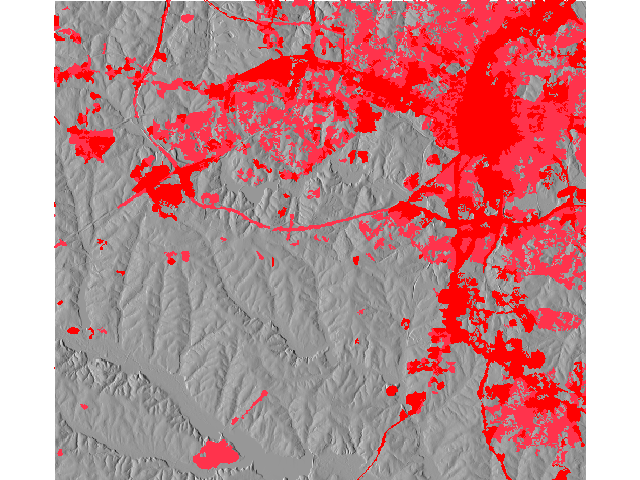

In [7]:
gs.parse_command('g.region', raster="landuse96_28m", flags='pg')
gs.run_command('d.erase')
gs.run_command('d.rast', map="elevation_shade")
gs.run_command('d.rast', map="landuse96_28m", values="1,2")
Image(filename="map.png")

#### Change colors for raster maps
There are many ways how to do it see _r.colors_ manual).

First create your own copy of the elevation map (see the command below).
Display it by Add raster > "myelev".

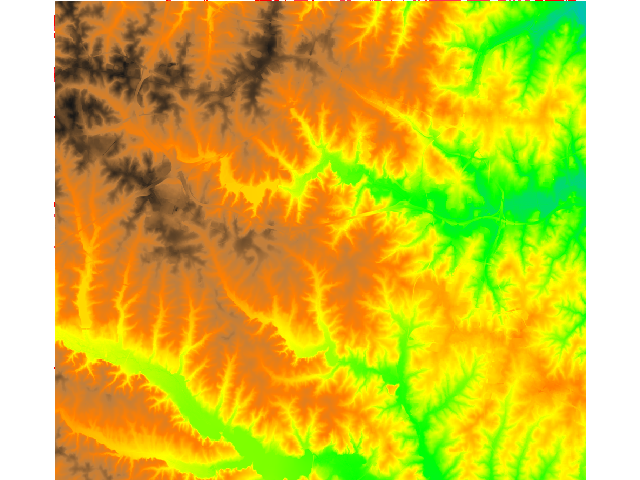

In [8]:
gs.run_command('g.copy', raster="elevation,myelev")
gs.run_command('d.rast', map="myelev")
Image(filename="map.png")

Set the color table to a predefined one, for example "bgyr" (blue, green, yellow, red).

GUI options: Right Click on the raster layer "myelev" in Layer Manager > _Set color table_ > _Define_ > _Name of color table_ > "bgyr" > _Run_.
If you don't see the new colors - click the second button in Map Display to redraw.

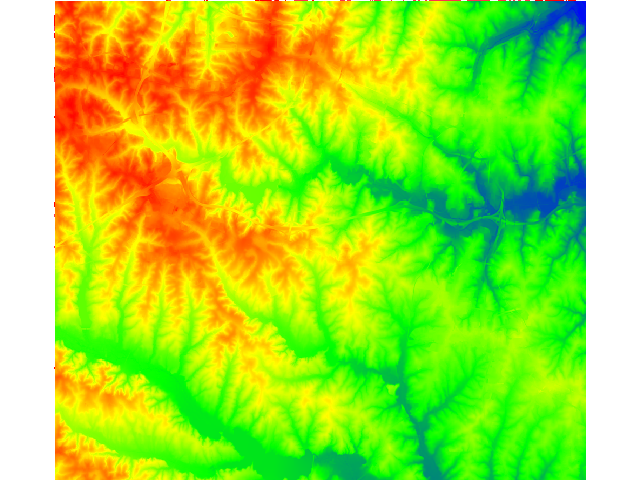

In [9]:
gs.run_command('r.colors', map="myelev", color="bgyr")
gs.run_command('d.rast', map="myelev")
Image(filename="map.png")

Change the color table interactively using rules:

In the Layer Manager manu click _Raster_ > _Manage colors_ > _Manage Color rules interactively_.
Select raster map "myelev".
Click on colored squares to change the color, click _Preview_.
If it looks good - click OK.

To create color table for future multiple uses
type the rules into a plain text mycolor.txt file
using a text editor (TextEdit, Notepad), for example:

In [10]:
%%file mycolor.txt
50 blue
70 aqua
90 green
110 yellow
130 orange
160 brown

Writing mycolor.txt


Then assign it as follows:
Right click on "myelev" map layer > _set color table_ > _Define_ > _Path to rules file_ > _Run_.
If needed, redraw using the second button on Map Display.
You can also create and assign the above color table by typing or pasting it into the
_enter values interactively_ window
or run it from comand line (make sure you have the correct path,
in the following example `mycolor.txt` should be replaced
by e.g. /Users/john/mycolor.txt on Mac OS X):

In [11]:
gs.run_command('r.colors', map="myelev", rules="mycolor.txt")

0

Note that you can combine color RGB and name definitions
as well as % and cat/val to create complex custom color tables
and store them in a text file for future use, see the examples in _r.colors_ man page.

#### Compare the use of equal interval and histogram equalized color table for slope

To add the legend use _Add map elements_ button on Map Display.

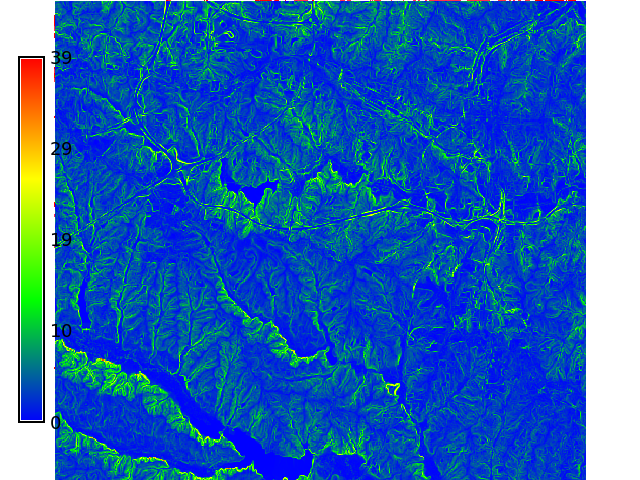

In [12]:
gs.run_command('g.copy', raster="slope,myslope")
gs.run_command('r.colors', map="myslope", color="bgyr")
gs.run_command('d.rast', map="myslope")
gs.run_command('d.legend', raster="myslope")
Image(filename="map.png")

To explain the difference between the two maps, you can generate a histogram.
On map Display click on _Analyze map_ > _Create histogram_ to open the histogram tool and
save results to graphics file. Or use this command which will
add a histogram as a layer to Layer Manager.

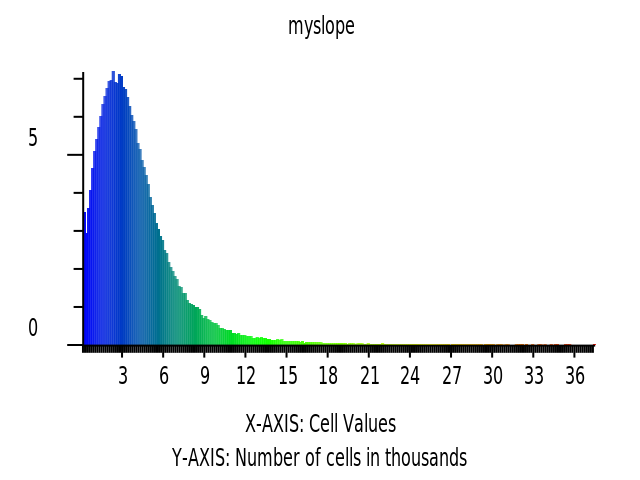

In [13]:
gs.run_command('d.histogram', map="myslope")
Image(filename="map.png")

Now set the histogram equalized color table, and save the new slope map and histogram images.
Describe the effect of the histogram equalized color table.

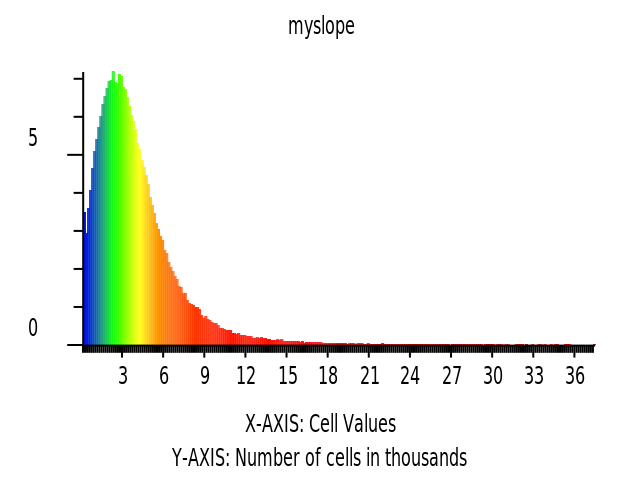

In [14]:
gs.run_command('r.colors', map="myslope", color="bgyr", flags='e')
Image(filename="map.png")
gs.run_command('d.histogram', map="myslope")
Image(filename="map.png")

### Modify legend, scale and grid
To re-size the legend for myslope, right click on the legend,
select Resize legend and resize with mouse.
Alternatively you can resize by selecting _Pointer_ mode in Map Display, double clicking on legend to launch the legend dialog
and set options > _Optional_ > _Placement_ > 50,90,4,7.
Numbers are bottom,top,left,right as percentage of screen coordinates.
Add units to the legend: _Add map elements_ > _Add text layer_ > type deg > OK.
Add barscale on Map Display: _Add map elements_ > _Show/hide north arrow_ (double click on it to change it).

Note: you can use horizontal legends by using Placement at=6,10,2,30
or just stretch it horizontally with mouse.

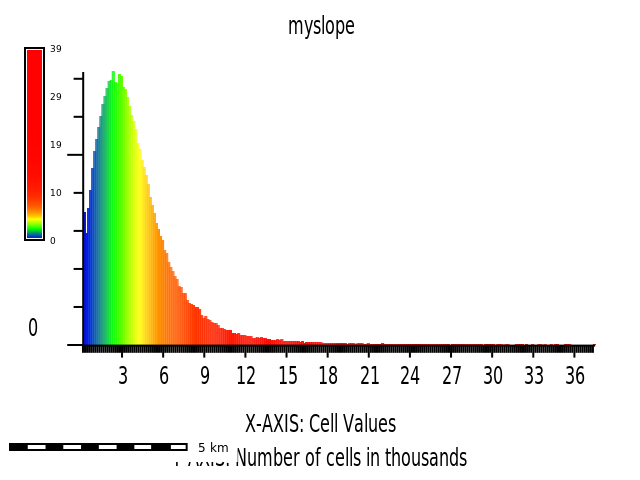

In [15]:
gs.run_command('d.barscale')
gs.run_command('d.legend', raster="myslope", at="50,90,4,7")
Image(filename="map.png")

Switch off "myslope", display "myelev" raster and change the legend to "myelev" raster.
Add grid for state plane coordinates at 5000m with ticks at 1000m.
Also add a lat/long grid at 2 arc minute interval.

In Layer Manager > _Add various overlays_ > _Add grid layer_ > Size 5000 > Run.
To draw only border with ticks: change Size to 1000 and click _Disable_ > _Disable grid drawing_ > Run.
Switch off _Disable grid drawing_.
To draw lat/long grid: set _Required_ > Size to 0:02 > click _Draw_ > _Draw geographic grid_ > Run.
Command line alternative:

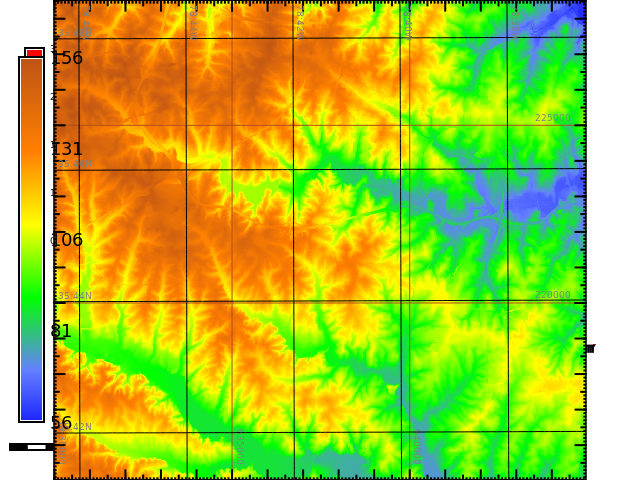

In [16]:
gs.run_command('d.rast', map="myelev")
gs.run_command('d.legend', raster="myelev")
gs.run_command('d.grid', size="5000", color="brown")
gs.run_command('d.grid', size="1000", flags='n')
gs.run_command('d.grid', size="0:02", color="black", flags='g')
Image(filename="map.png")

### Display color composite
In Layer Manager: _Add various raster map layers_ > _Add RGBmap layer_.

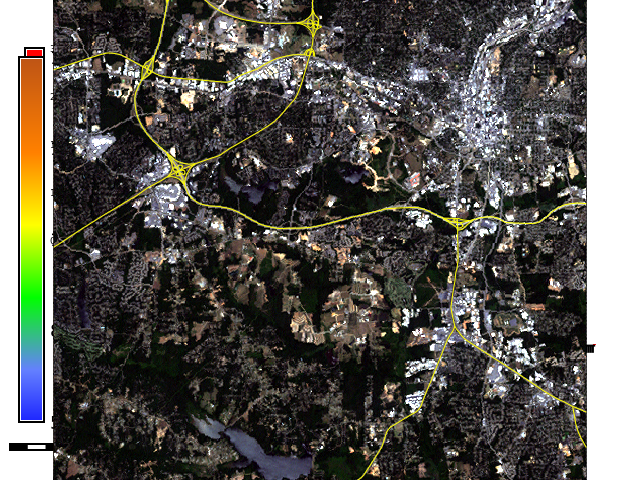

In [17]:
gs.run_command('d.rgb', red="lsat7_2002_30", green="lsat7_2002_20", blue="lsat7_2002_10")
gs.run_command('d.vect', map="roadsmajor", color="yellow")
Image(filename="map.png")

### Export NC precipitation stations data to KML and post in Google Earth

To see what you are exporting, add the _precip_30ynormals_ raster
or use the following command:

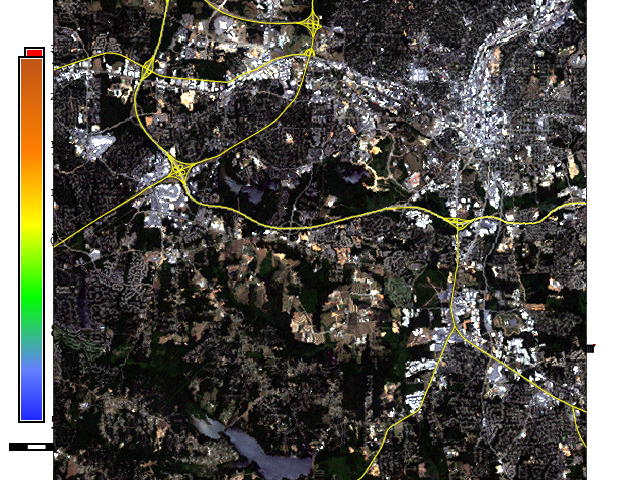

In [18]:
gs.run_command('d.vect', map="precip_30ynormals")
Image(filename="map.png")

You may need to use right click in _Layers_ to zoom to the extent
of the whole vector map. Then use _v.out.ogr_ to
export the vector map in the KML format.
If your are running the command in GUI do not forget to click point for
data type. To view the data in Google Earth just drag and drop the KML
file in the Google Earth window.
_Make sure you include extension ".kml" in the output file name._

In [19]:
gs.run_command('v.out.ogr', input="precip_30ynormals", output="precipitation.kml", format="KML", type="point")

0

You need to set the file path to the desired directory or work using the
current working directory. On MS Windows, you may do something like this:

```
v.out.ogr precip_30ynormals output=C:\temp\precipitation.kml format=KML type=point
```

### Optional part

#### Add WMS layer
View and download orthophoto through web mapping service.
Requires good internet connection. If it doesn't work, report the problem
including any error message in the report.
First change region to the small rural area and display the provided orthophoto.

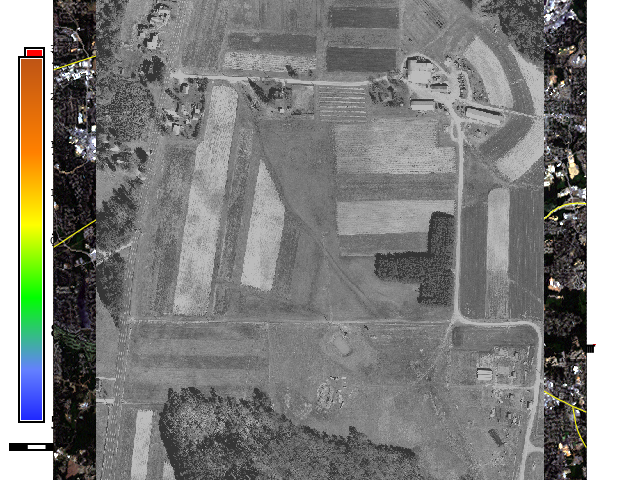

In [20]:
gs.parse_command('g.region', region="rural_1m", flags='pg')
gs.run_command('d.rast', map="ortho_2001_t792_1m")
Image(filename="map.png")

In Layer Manager toolbar _Add web service layer_.
Paste the link to the service into server field and press connect:
```
https://services.nationalmap.gov/arcgis/services/USGSNAIPPlus/MapServer/WMSServer?
```
Wait until GUI changes.
In list of layers, there should be "USGSNAIPImagery", click on that.
Press Add layer button and wait.
The dialog can be closed afterwards.

To save the layer:
Right click on the web service layer in Layer Manager - choose _Save web service layer_.
In dialog, set the name of the layer ortho_new and press _Save layer_.

#### Map Swipe
Use mapswipe to compare the new orthophoto with the ortho provided in the data set:
_File_ > _Map Swipe_.
Add raster > select "ortho_2001_t792_1m" and "ortho_new".

Move slider to compare images - what changes do you observe?
Save a screenshot of the mapswipe window showing the comparison of orthos.
See more options [here](http://grasswiki.osgeo.org/wiki/WxGUI_Map_Swipe).

In [21]:
# end the GRASS session
os.remove(rcfile)